# Lab1: Gradient descent principles

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Gradient descent method
#### 1.1. A simple quadratic function

$f(x)=x_1^2+x_2^2$

We first begin with creating a function which does the gradient descent:

$x^{k+1}=x^k-\alpha^k\nabla f(x^k)$

where k is the iteration and $\nabla f(x)=(2x_1, 2x_2)$ the gradient.

In [2]:
def grad_desc_convex(x0, fig, alpha, iters):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    for k in range(iters):
        gradx = np.array([x0[0] * 2, x0[1] * 2])
        x0 = x0 - alpha * gradx
        fig.plot(*x0, 'r.')
         
    print("solution : %.20f, %.20f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    return fig

Then, we create another function to run the entire algorithm which as input needs the parameters of $\alpha$ and the number of iterations. In this way we can change the value of these parameters easily.

In [3]:
def algorithm1(alpha,iters):
    fig = plt.figure(figsize=(20,5))

    num_plots = 3
    base = 100 + num_plots * 10

    for i in range(num_plots):
        ax = fig.add_subplot(base+(1+i))

        X = np.arange(-2, 2, 0.05)
        Y = np.arange(-2, 2, 0.05)
        X, Y = np.meshgrid(X, Y)

        Z = X**2 + Y**2 
        ax.contour(X, Y, Z, 50)

        gradx = 2 * X
        grady = 2 * Y 
        ax.streamplot(X, Y, gradx, grady)

        x_lim = 3.5
        x = x_lim*np.random.random(2) - x_lim/2
        ax = grad_desc_convex(x, ax, alpha, iters)

    plt.show()

We test the algorithm setting $\alpha$ = 0.1, and plot the contour graph of the function with the path the gradient descent follows. The initial point is represented with a black dot, each step is represented with a red dot, and the minimum is represented with a blue cross.

We tested the algorithm with three different $x_0$ starting points generated randomly to demonstrate that no matter what the starting point is we always converge to the minimum. 

It is clear from the result that the only minimum this function has is zero (and this makes sense since it is a convex function with just one minima) with all of the three random $x_0$ merging to zero.  

solution : -0.00000000020035066803, 0.00000000032070233739
solution : -0.00000000013650755152, -0.00000000026567305646
solution : -0.00000000006262233227, -0.00000000013459711924


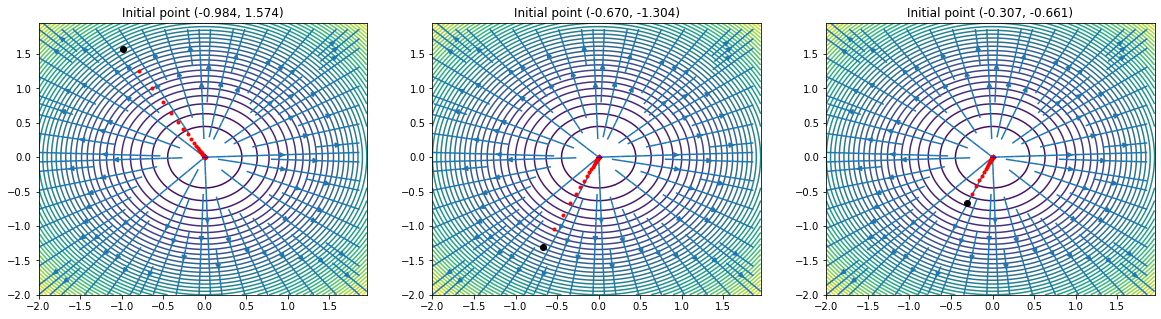

In [4]:
algorithm1(0.1,100)

We then tested the same algorithm but with 1,000 iterations instead of 100. This resulted in a solution closer to zero compared to the one achieved above for 100 indicating that the more iterations that are tested the closer the solution arrives to the minimum.

solution : -0.00000000000000000000, -0.00000000000000000000
solution : 0.00000000000000000000, -0.00000000000000000000
solution : -0.00000000000000000000, 0.00000000000000000000


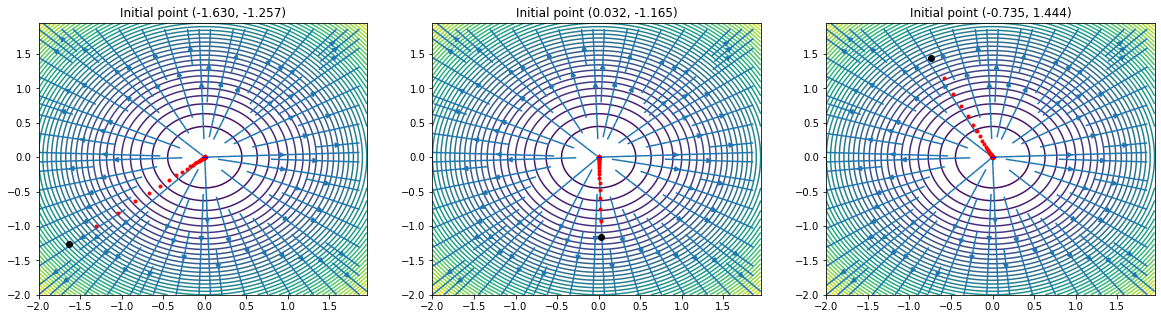

In [5]:
algorithm1(0.1,1000)

However it should be noted that the difference is not significant and hence it is not necessary to perform 1,000 iterations. In fact if we add a precision of 0.0001 we get convergence after just 25 steps. 

Next we test adjusting the value of $\alpha=1$. We should see some difference now, since this parameter defines the magnitude of the step used for the gradient descent method. If the value is bigger it might seem that the convergence will be faster but we check that this is not the case.

solution : -0.76543715625693375948, 1.68751664658702571487
solution : 0.91760603669088869339, 1.61255907857706759501
solution : -1.66921717602635988342, 0.19972635128799165471


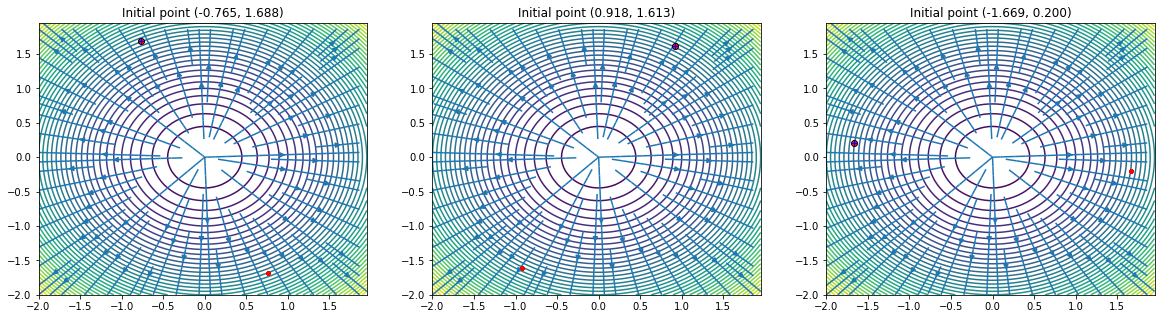

In [6]:
algorithm1(1,100)

This time, we do not get convergence. This situation is very interesing, because the inverse of any gradient vectors in this case can be represented with a line whose middle is precisely the minimum of the function. That's the reason why, by having $\alpha$ = 1, the x is only going from one extremity of this line to the other, without having the possibility to reach the middle.<br>

We can now try with a value really close to 1, with a value of 0.95

solution : -0.00003157105223780109, 0.00000811411540600110
solution : 0.00004623456087582735, -0.00003089072056760301
solution : -0.00000480481864164453, 0.00000063325434846303


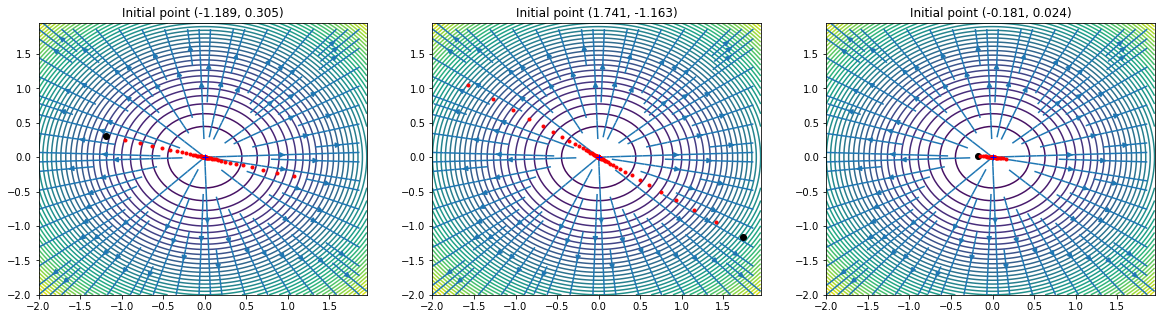

In [7]:
algorithm1(0.95,100)

In this case, we can see that the algorithm achieves the goal of converging to the minimum, but this is not efficient since it always exceeds the solution and has to go back and forth, each time getting a little bit closer, until reaching the minimum.<br>
Finally, we can try the algorithm with $\alpha$ = 2 :

solution : 1008142399119.93676757812500000000, 804052961501.89880371093750000000
solution : -1100831224664.13916015625000000000, 1244044286073.31103515625000000000
solution : -1453744529659.71630859375000000000, -980076553669.54565429687500000000


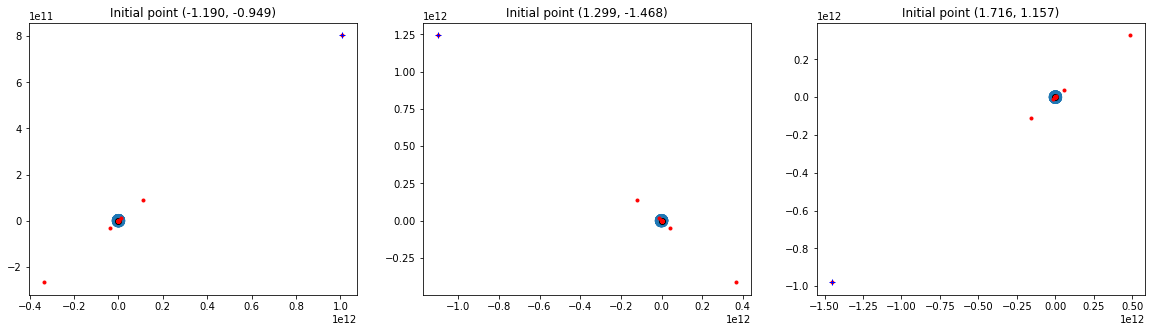

In [8]:
algorithm1(2,25)

As we could expect, with $\alpha$ > 1, it as totally impossible for the algorithm to converge to the minimum, because it is always moving away from it. This is the reason why the result we obtain at the end has no sense. <br>
We can see then that it is necessary to have : 0 < $\alpha$ < 1. 

#### 1.2. A more complex function

$f(x_1,x_2)= x_1^2(4 - 2.1x_1^2 + \frac{1}{3}x_1^4) + x_1x_2 + x_2^2(-4+4x_2^2)$\
where  $\nabla f(x)=(2x_1^5-8.4x_1^3+8x_1+x_2, x_1+16x_2^3-8x_2)$ 

We are now working on a more complex function, hence we decided to first create the function itself. It is absolutely not possible to guess which minima of this function are going to be found, as the minima will depend on the starting point. So in this case we might have several local minimum. 

In [9]:
def function(x):
    X=x[0]
    Y=x[1]
    return X**2 * (4 - 2.1*X**2 + X**4/3.0) + X*Y + Y**2*(-4+4*Y**2)
    

We begin with the simple algorithm explained before, with only 100 iterations. Since here it is harder to get the minima we will use a very small $\alpha$ value. If not, depending on the initial point the algorithm can't converge inside the gradient descent map. 

In [10]:
def grad_desc_non_convex(x0, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')

    for k in range(iters):
        gradx = np.array([2*x0[0]**5-8.4*x0[0]**3+8*x0[0]+x0[1], x0[0]+16*x0[1]**3-8*x0[1]])
        x0 = x0 - alpha * gradx
        fig.plot(*x0, 'r.')

    return fig


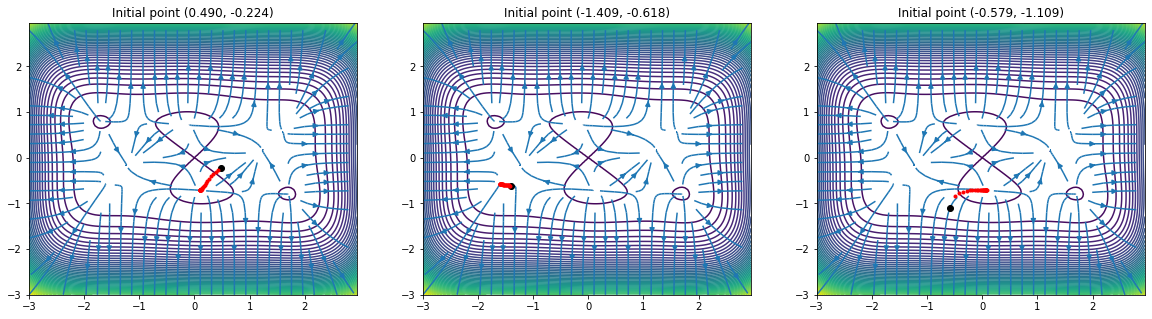

In [15]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5-8.4*X**3+8*X+Y
    grady = X+16*Y**3-8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    iters = 25
    
    x_lim = 3.5
    x = x_lim*np.random.random(2) - x_lim/2
    
    alpha = 0.02
    ax = grad_desc_non_convex(x, ax, alpha, iters)

plt.show()

We can see here that the algorithm works, and most of the time the minimum is found in the same valley as the original x. However, it is also easy to get a local minimum. 

Now, we will create a new algorithm which will stop depending on some criterion, in order to make the process more efficient: 
- Our algorithm is updating the points even though the minimum has already been reached, so now our two stop conditions will be:

    $|f(x_{k+1})-f(x_k)|<10^{-8}\ \ \ \ \text{or}\ \ \ \ ||\nabla f(x_k)|| < 10^{-5}$
    
  The first condition will be accomplished if the step is no longer meaningful. On the other hand, we know that the gradient is   zero in a critical point, so we use this fact for the second condition.<br><br>

- The second way is to control the magnitude of the step, $\alpha$. We begin with a large value and we update it. If the   function increases we reduce by half its value and try again.

We decide here to write not only the solution obtained, but also the number of iterations needed.

In [12]:
def grad_desc_non_convex_criterion(x0, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = function(x0)
    
    for i in range(iters):
        gradx = np.array([2*x0[0]**5-8.4*x0[0]**3+8*x0[0]+x0[1], x0[0]+16*x0[1]**3-8*x0[1]])
        x = x0 - alpha * gradx
        f = function(x)
        while (f>f0): 
            alpha = alpha/2
            x = x0 - alpha * gradx
            f = function(x)  
        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-8) | (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
            
        f0=f    
        x0=x
    fig.plot(*x0, 'b+')
    
    return fig


number of points : 12
solution : 0.090, -0.713
number of points : 14
solution : -0.090, 0.713
number of points : 17
solution : -1.704, 0.796


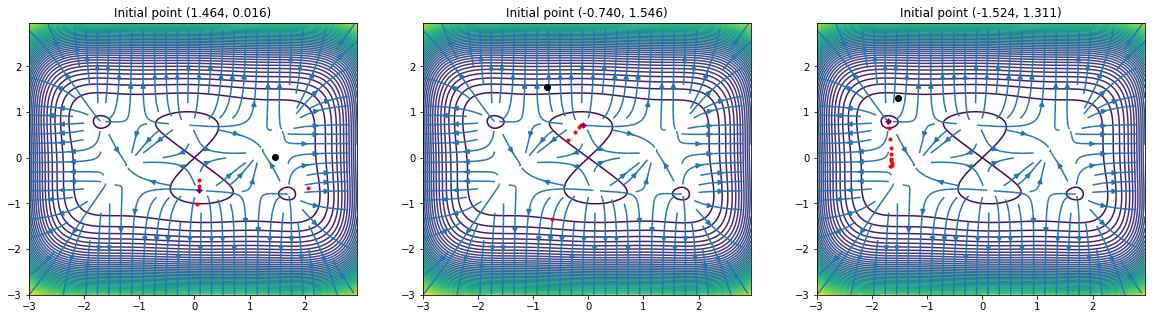

In [14]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots*10

for i in range(num_plots):
    ax = fig.add_subplot(base + (1 + i))

    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    max_iters = 5000
    
    x_lim = 3.5
    x = x_lim*np.random.random(2) - x_lim/2
    alpha_init = 1
    ax = grad_desc_non_convex_criterion(x, ax, alpha_init, max_iters)

plt.show()

The backtracking algorithm proves to be more efficient at finding the minimum with just around 10 iterations needed. This is because the $\alpha$ value can be higher at the beginning and so the steps are higher and make the x be closer to the minimum faster. Moreover, since the steps are higher, the probability to get stuck in a minimum is reduced. And apart from this the stop criterion makes the algorithm stop when it reaches the minimum. 

#### 1.3. The Rosenbrock function

$f(x_1,x_2)= (a-x_1)^2 + b(x_2-x_1^2)^2$\
where  $\nabla f(x)=(-2(a-x_1)-4x_1b(x_2-x_1^2), 2b(x_2-x_1^2)$ with a=1 and b=100.

In [68]:
def grad_desc_rosenbrock_criterion(x0, fig, alpha, num_iter, a, b):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = rosenbrock_function(x0)
    
    for i in range(num_iter):
        gradx = gradx = np.array([-2*(a-x0[0])-4*x0[0]*b*(x0[1]-x0[0]**2), 2*b*(x0[1]-x0[0]**2)])
        x = x0 - alpha * gradx
        f = rosenbrock_function(x)
        while (f>f0): 
            alpha = alpha/2
            x = x0 - alpha * gradx
            f = rosenbrock_function(x)

        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-8) & (np.linalg.norm(gradx) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.20f, %.20f"%(x[0],x[1]))
            fig.plot(*x, 'b+')
            break
        
        f0=f    
        x0=x

    return fig

In [69]:
def rosenbrock_function(x):
    X=x[0]
    Y=x[1]
    return (a-X)**2 + b*((Y-X**2)**2)
    

The last exercise is repeated for this different case:

number of points : 9831
solution : 0.99988829480296448349, 0.99977615505463790502
number of points : 9708
solution : 0.99988832688093343126, 0.99977621933179072755
number of points : 9888
solution : 0.99988834769588186280, 0.99977626104034411636


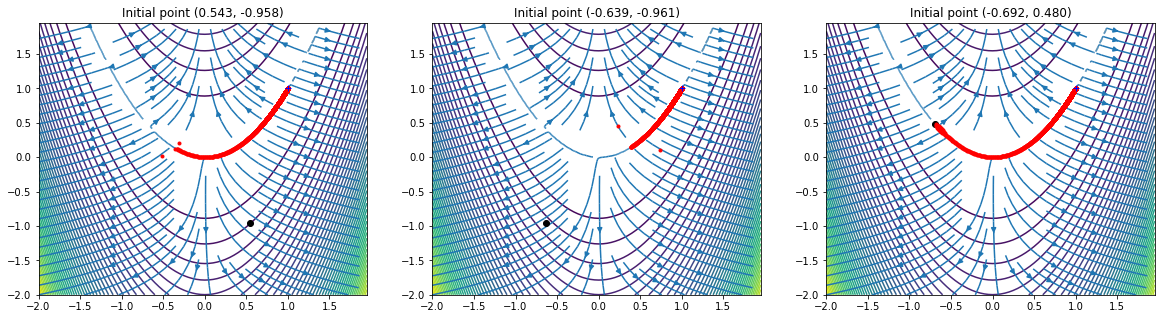

In [72]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots*10

a = 1
b = 100

for i in range(num_plots):
    ax = fig.add_subplot(base + (1 + i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = rosenbrock_function(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = -2*(a-X)-4*X*b*(Y-X**2)
    grady = 2*b*(Y-X**2)
    ax.streamplot(X, Y, gradx, grady)
    
    max_iters = 50000
    
    x_lim = 3.5
    np.random.seed(10+i)
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(-1,1)
    x = (x1,x2)
    alpha_init = 1.
    ax = grad_desc_rosenbrock_criterion(x, ax, alpha_init, max_iters, a, b)
    

plt.show()

Even though this function has just 1 minimum (1, 1) it is very difficult to reach it due to its shape. As expected the minimum for Rosenbrock function is not found efficiently, with 9-10 thousand iterations needed. 

### 2. Newton descent method
#### 2.1. A simple quadratic function
##### 1) Gradient descent algorithm

In [120]:
def function1(x):
    return 100*x[0]**2 + x[1]**2

In [121]:
def grad_desc_convex_criterion(x0, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = function1(x0)
    
    for i in range(iters):
        gradx = np.array([x[0]*200, x[1]*2])
        x1 = x - alpha * gradx
        f = function1(x1)
        while (f>f0): 
            alpha = alpha/2
            x1 = x - alpha * gradx
            f = function1(x1)
        f0=f
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x=x1
        fig.plot(*x, 'r.')
        if(np.abs(distance) < 10e-3) | (np.linalg.norm(gradx) < 10e-5):
            print("number of iterations : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig

number of iterations : 394
solution : -0.000, 0.007
number of iterations : 449
solution : 0.000, 0.007
number of iterations : 481
solution : 0.000, 0.007


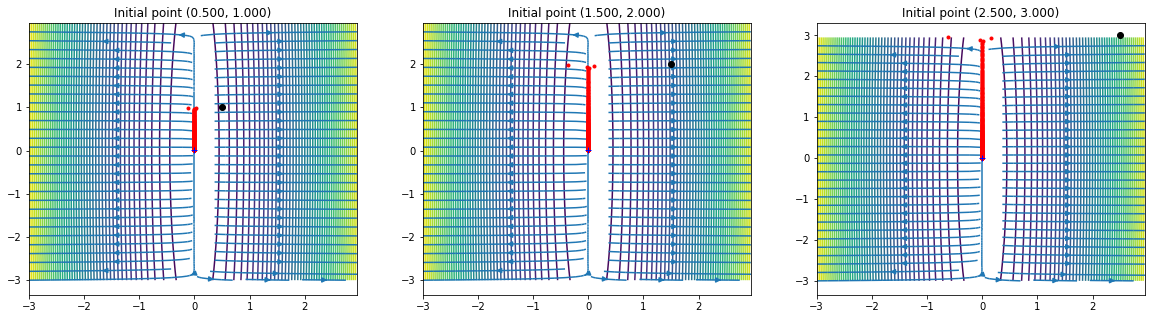

In [122]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function1(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = X*200
    grady = Y*2
    ax.streamplot(X, Y, gradx, grady)
    
    iters = 1000
    
    x_lim = 2.
    x = np.add((.5,1),(i,i))
    
    alpha = 0.05
    ax = grad_desc_convex_criterion(x, ax, alpha, iters)

plt.show()

##### 2) Newton descent algorithm

In [51]:
def newton_convex(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    f0 = function1(x)
    
    for i in range(iters):
        gradx = np.array([x[0]*200, x[1]*2])
        hessianx = np.array([[200,0],[0,2]])
        x1 = x - alpha * np.linalg.solve(hessianx,gradx)
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x = x1
        f = function1(x)
        f0=f
        fig.plot(*x, 'r.')
        if(np.abs(distance) < 10e-3) | (np.linalg.norm(gradx) < 10e-5):
            print("number of iterations : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig

number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000


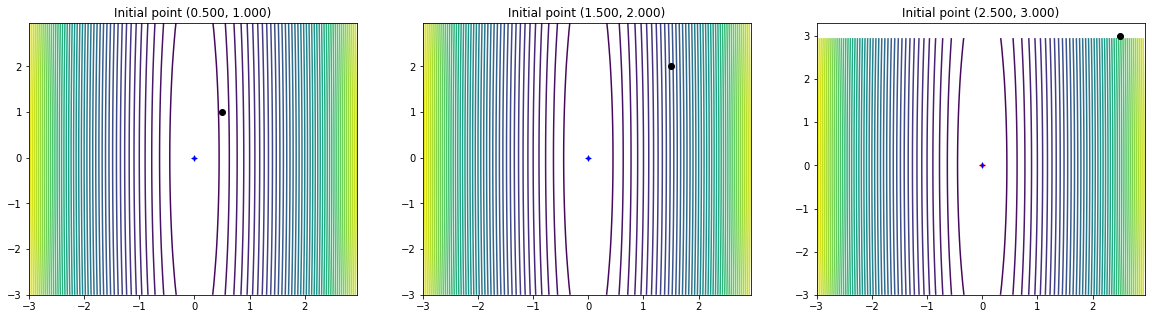

In [52]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function1(x)
    ax.contour(X, Y, Z, 50)
    
    iters = 1000
    
    x_lim = 2.
    x = np.add((.5,1),(i,i))
    
    alpha = 1
    ax = newton_convex(x, ax, alpha, iters)

plt.show()

We observe that the Newton Method is more efficient at finding the minimum for a convex function compared to that of the gradient descent. To minmise the function with gradient descent required 400-500 iterations, while Newtons Method required just one.

#### 2.2. A more complicated function
##### 1) Gradient descent algorithm

In [117]:
def function2(x):
    X=x[0]
    Y=x[1]
    return (X**2)*(4-(2.1*(X**2))+(1/3)*(X**4))+X*Y+(Y**2)*(-4+4*(Y**2))

In [127]:
def grad_desc_convex_criterion(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    f0 = function2(x)
    
    for i in range(iters):
        gradx = np.array([2*x[0]**5 - 8.4*x[0]**3 + 8*x[0] + x[1], x[0] + 16*x[1]**3 - 8*x[1]])
        x1 = x - alpha * gradx
        f = function2(x1)
        while (f>f0): 
            alpha = alpha/2
            x1 = x - alpha * gradx
            f = function2(x1)
        f0=f
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x=x1
        fig.plot(*x, 'r.')
        if(np.abs(distance) < 10e-3) | (np.linalg.norm(gradx) < 10e-5):
            print("number of iterations : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
    fig.plot(*x, 'b+')
    
    return fig

number of iterations : 23
solution : 0.090, -0.713
number of iterations : 24
solution : 0.090, -0.713
number of iterations : 24
solution : -0.090, 0.713


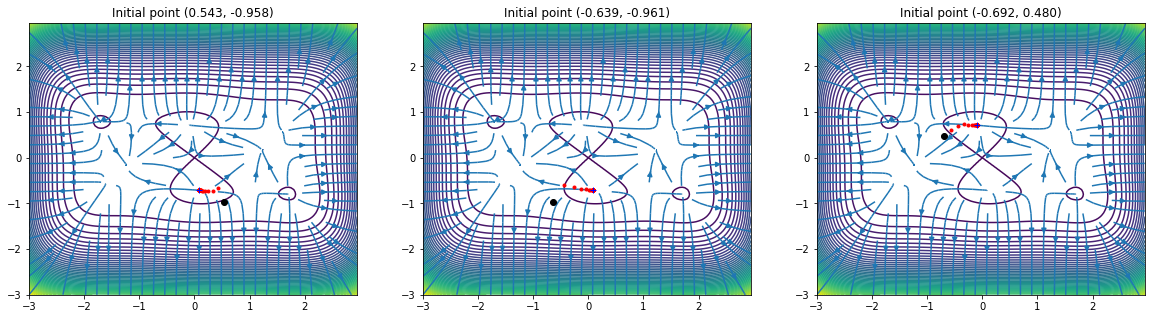

In [149]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-3, 3, 0.05)
    Y = np.arange(-3, 3, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function2(x)
    ax.contour(X, Y, Z, 50)
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    ax.streamplot(X, Y, gradx, grady)
    
    iters = 10000
    
    x_lim = 2.
    
    np.random.seed(10+i)
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(-1,1)
    x = (x1,x2)
    
    alpha = 0.05
    ax = grad_desc_convex_criterion(x, ax, alpha, iters)

plt.show()

##### 2) Newton - Gradient descent algorithm

In [150]:
def grad2(x):
    X=x[0]
    Y=x[1]
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    
    return[gradx, grady]

def hessian2(x):
    X=x[0]
    Y=x[1]
    
    hessx = 10*X**4-25.2*X**2+8
    hessy = 48*Y**2-8
    
    return[hessx, hessy]

In [194]:
def newton_non_convex(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    for i in range(iters):
        grad = np.array(grad2(x))
        hessian = np.array(hessian2(x))
        hessMatrix = np.array([[hessian[0],0],[0,hessian[1]]])
        
        
        #check if Hessian Matrix is definite positive
        positive = np.all(np.linalg.eigvals(hessMatrix) > 0)
        
        if positive:
            x1 = x - alpha * np.linalg.solve(hessMatrix,grad)
        else:
            x1 = x - alpha * grad
        
        #backtracking for alpha
        f0 = function2(x)
        f = function2(x1)
        while (f>f0): 
            alpha = alpha/2
            if positive:
                x1 = x - alpha * np.linalg.solve(hessMatrix,grad)
            else:
                x1 = x - alpha * grad
            f = function2(x1)
        f0=f
        
        #stop criterion 
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x=x1
                          
                          
        if positive:
            fig.plot(*x, 'g.') 
        else:
            fig.plot(*x, 'r.') 
           
        #if(np.abs(distance) < 10e-3) | (np.linalg.norm(grad) < 10e-5):
        if(np.linalg.norm(grad) < 10e-5):
            break
            
    print("number of iterations : %i"%i)
    print("solution : %.3f, %.3f"%(x[0],x[1]))
    fig.plot(*x, 'b+')
    
    return fig

number of iterations : 17
solution : 0.090, -0.713
number of iterations : 37
solution : -0.090, 0.713
number of iterations : 86
solution : -0.090, 0.713


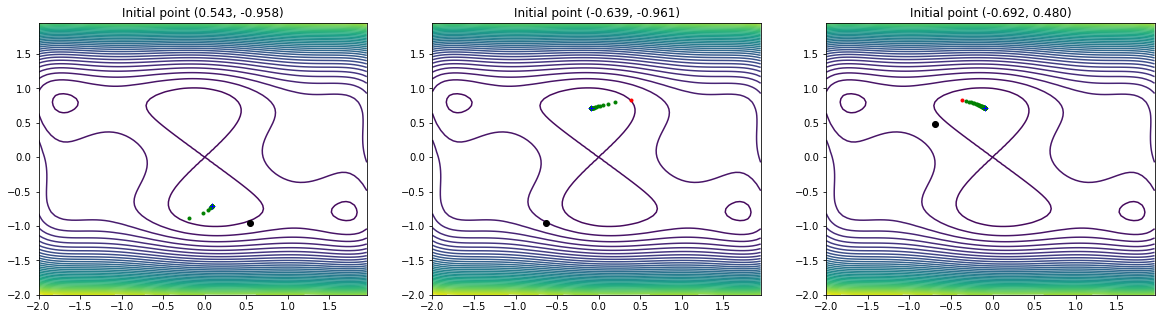

In [195]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = function2(x)
    ax.contour(X, Y, Z, 50)
    
    iters = 1000
    
    x_lim = 2.
    np.random.seed(10+i)
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(-1,1)
    x = (x1,x2)
    
    alpha = 1
    ax = newton_non_convex(x, ax, alpha, iters)

plt.show()

#### 2.3. Rosenbrock function


In [107]:
def ros_function(x):
    X=x[0]
    Y=x[1]
    a=1
    b=100
    return (a-X)**2 + b*((Y-X**2)**2)

def ros_grad(x):
    X=x[0]
    Y=x[1]
    gradx = -2+2*X-400*X*Y+400*X**3
    grady = 200*Y-200*X**2
    return[gradx, grady]

def ros_hess(x):
    X=x[0]
    Y=x[1]
    
    hess11 = 2+1200*X**2-400*Y
    hess12 = -400*X
    hess21 = -400*X
    hess22 = 200
    return[[hess11,hess12],[hess21,hess22]]

In [108]:
def newton_non_convex_ros(x, fig, alpha, iters):

    fig.set_title("Initial point (%.3f, %.3f)" % (x[0], x[1]))
    fig.plot(*x, 'ko')
    
    
    for i in range(iters):
        grad = np.array(ros_grad(x))
        hessMatrix=np.array(ros_hess(x))
        
        #check if Hessian Matrix is definite positive
        positive = np.all(np.linalg.eigvals(hessMatrix) > 0)
        
        if positive:
            x1 = x - alpha *np.linalg.solve(hessMatrix,grad)
        else:
            x1 = x - alpha * grad
        
        #backtracking for alpha
        f0 = ros_function(x)
        f = ros_function(x1)
        while (f>f0): 
            alpha = alpha/2
            if positive:
                x1 = x - alpha *np.linalg.solve(hessMatrix,grad)
            else:
                x1 = x - alpha * grad
            f = ros_function(x1)
        f0=f
        
        #stop criterion 
        distance = ((x[0]-x[1])**2+(x1[0]-x1[1])**2)**(1/2)
        x=x1
                          
                          
        if positive:
            fig.plot(*x, 'g.') 
        else:
            fig.plot(*x, 'r.') 
           
        if(np.abs(distance) < 10e-3) | (np.linalg.norm(grad) < 10e-5):
            break
            
    print("number of iterations : %i"%i)
    print("solution : %.3f, %.3f"%(x[0],x[1]))
    fig.plot(*x, 'b+')
    
    return fig

number of iterations : 24
solution : 0.995, 0.991
number of iterations : 79
solution : 0.994, 0.988
number of iterations : 142
solution : 0.994, 0.987


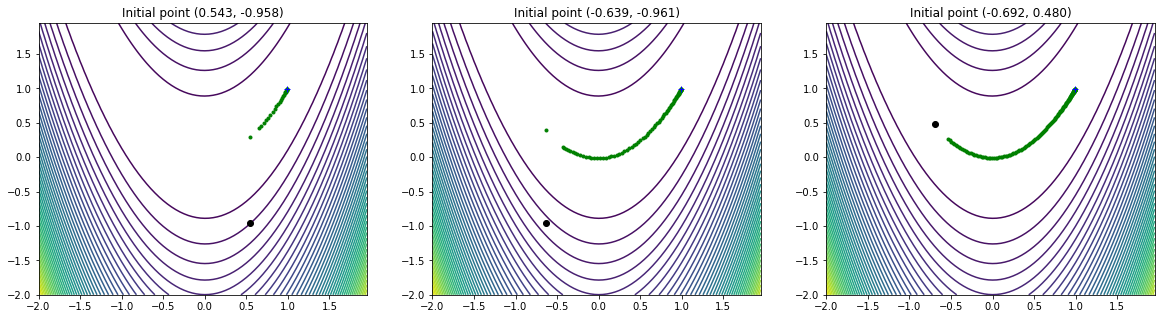

In [109]:
fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    ax = fig.add_subplot(base+(1+i))

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(X, Y)
    
    x=[X,Y]
    
    Z = ros_function(x)
    ax.contour(X, Y, Z, 50)
    
    iters = 5000
    
    x_lim = 2.
    np.random.seed(10+i)
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(-1,1)
    x = (x1,x2)
    
    alpha = 1
    ax = newton_non_convex_ros(x, ax, alpha, iters)

plt.show()